<a href="https://colab.research.google.com/github/ramesitexp/DataScience_Zone/blob/main/RealEstate_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
from google.colab import files
raw_data=files.upload()

Saving Real estate 2025.csv to Real estate 2025.csv


In [ ]:
df=pd.read_csv('Real estate 2025.csv')

In [ ]:
df.head()

,transaction_date,house_age,distance_to_mrt,convenience_store_count,latitude,longitude,price_per_unit_area
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


##Rename the colums

In [ ]:
df.rename(columns={ "X1 transaction date": "transaction_date",
    "X2 house age": "house_age",
    "X3 distance to the nearest MRT station": "distance_to_mrt",
    "X4 number of convenience stores": "convenience_store_count",
    "X5 latitude": "latitude",
    "X6 longitude": "longitude",
    "Y house price of unit area": "price_per_unit_area"},inplace=True)

In [ ]:
df.drop(columns=['No'],inplace=True)

##Data preprocessing

In [ ]:
df.count()

,0
transaction_date,414
house_age,414
distance_to_mrt,414
convenience_store_count,414
latitude,414
longitude,414
price_per_unit_area,414


In [ ]:
df.tail()

,transaction_date,house_age,distance_to_mrt,convenience_store_count,latitude,longitude,price_per_unit_area
409,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5
413,2013.500,6.5,90.45606,9,24.97433,121.54310,63.9


In [ ]:
df.head()

,transaction_date,house_age,distance_to_mrt,convenience_store_count,latitude,longitude,price_per_unit_area
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [ ]:
df.iloc[200:211]

,transaction_date,house_age,distance_to_mrt,convenience_store_count,latitude,longitude,price_per_unit_area
200,2013.417,17.4,995.7554,0,24.96305,121.54915,25.5
201,2013.417,13.1,561.9845,5,24.98746,121.54391,45.9
202,2012.917,38.3,642.6985,3,24.97559,121.53713,31.5
203,2012.667,15.6,289.3248,5,24.98203,121.54348,46.1
204,2013.000,18.0,1414.8370,1,24.95182,121.54887,26.6
205,2013.083,12.8,1449.7220,3,24.97289,121.51728,21.4
206,2013.250,22.2,379.5575,10,24.98343,121.53762,44.0
207,2013.083,38.5,665.0636,3,24.97503,121.53692,34.2
208,2012.750,11.5,1360.1390,1,24.95204,121.54842,26.2
209,2012.833,34.8,175.6294,8,24.97347,121.54271,40.9


In [ ]:
df.isnull().sum()

,0
transaction_date,0
house_age,0
distance_to_mrt,0
convenience_store_count,0
latitude,0
longitude,0
price_per_unit_area,0


In [ ]:
print(df.dtypes)


transaction_date           float64
house_age                  float64
distance_to_mrt            float64
convenience_store_count      int64
latitude                   float64
longitude                  float64
price_per_unit_area        float64
dtype: object


In [ ]:
df.describe()

,transaction_date,house_age,distance_to_mrt,convenience_store_count,latitude,longitude,price_per_unit_area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


@Convert transction date to year and month

In [ ]:
# Split 'transaction_date' into 'year' and 'month'
df["year"] = df["transaction_date"].astype(int)
df["month"] = ((df["transaction_date"] - df["year"]) * 12 + 1).astype(int)

# Drop original transaction_date column if no longer needed
df.drop(columns=["transaction_date"], inplace=True)



KeyError: 'transaction_date'

In [ ]:

new_order = ['year', 'month', 'house_age', 'distance_to_mrt', 'convenience_store_count',
             'latitude', 'longitude', 'price_per_unit_area']
df = df.reindex(columns=new_order)

In [ ]:
df.head()

,year,month,house_age,distance_to_mrt,convenience_store_count,latitude,longitude,price_per_unit_area
0,2012,12,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012,12,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013,7,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013,7,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012,10,5.0,390.56840,5,24.97937,121.54245,43.1


In [ ]:
df.shape

(414, 8)

##EDA diagram

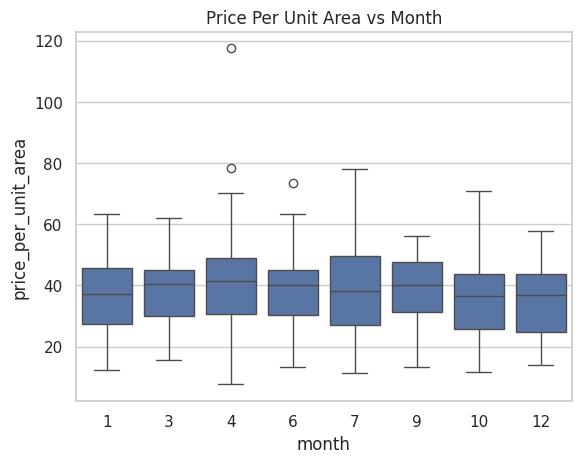

In [ ]:
sns.boxplot(x='month', y='price_per_unit_area', data=df)
plt.title("Price Per Unit Area vs Month")
plt.show()


✅ 1. Univariate Analysis (One Variable at a Time)



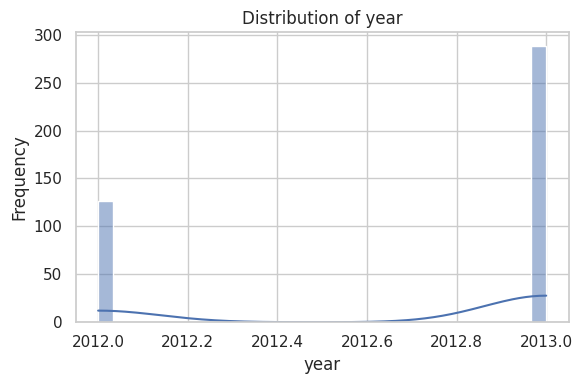

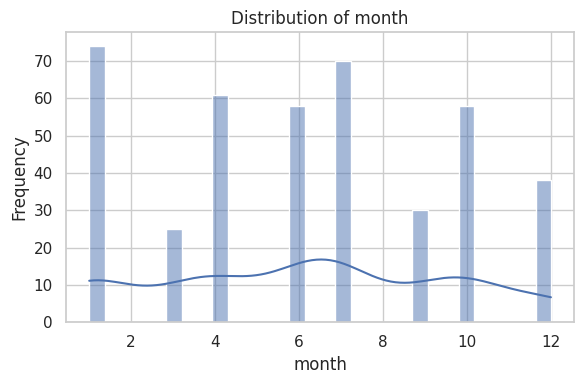

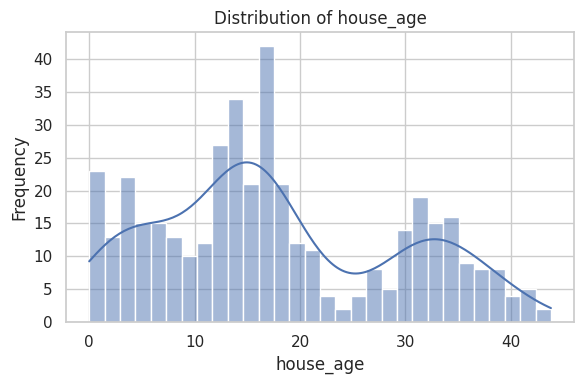

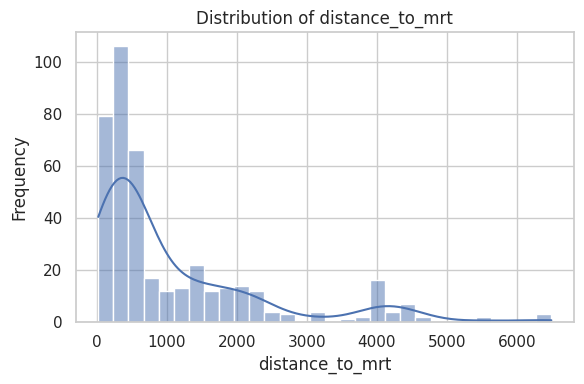

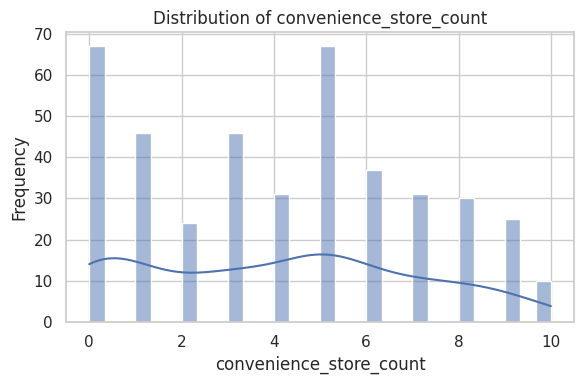

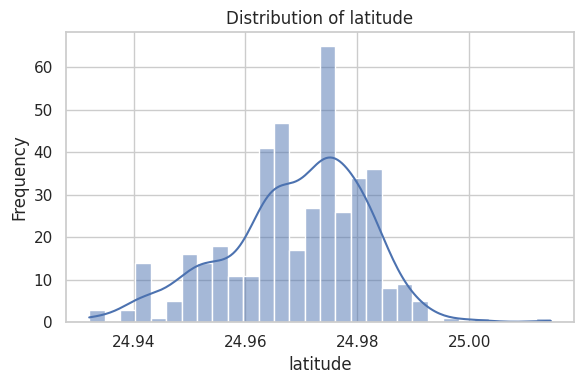

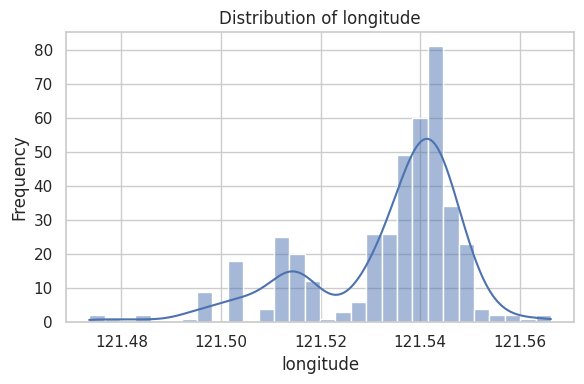

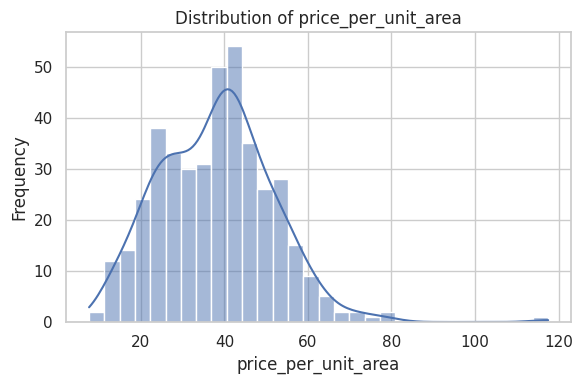

In [ ]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Plot histogram with KDE for each numeric column
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

Bivariate Analysis (Target vs Each Feature)

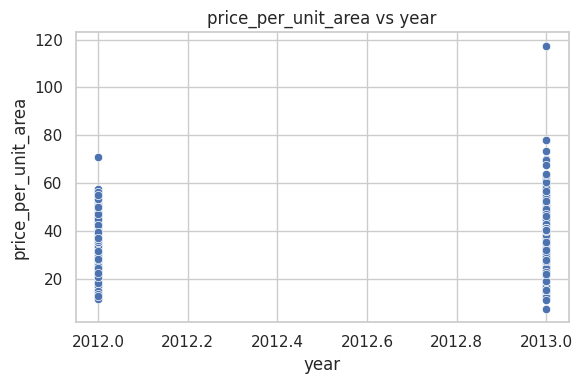

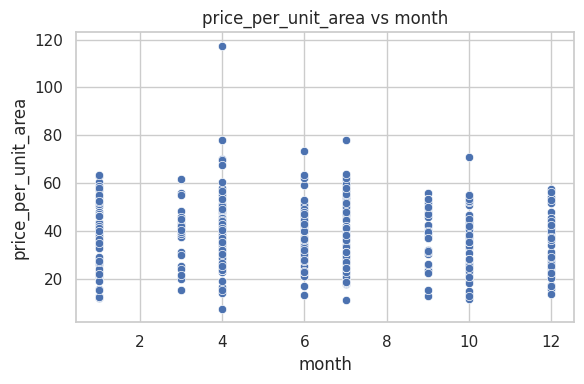

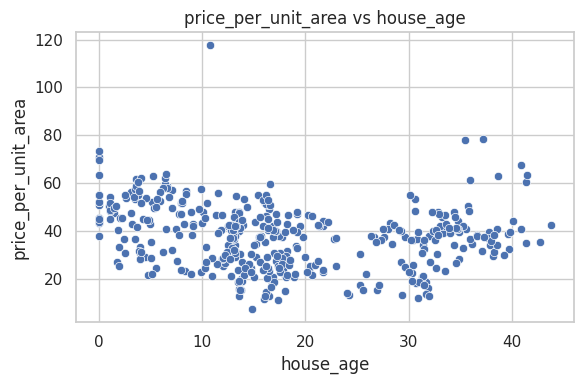

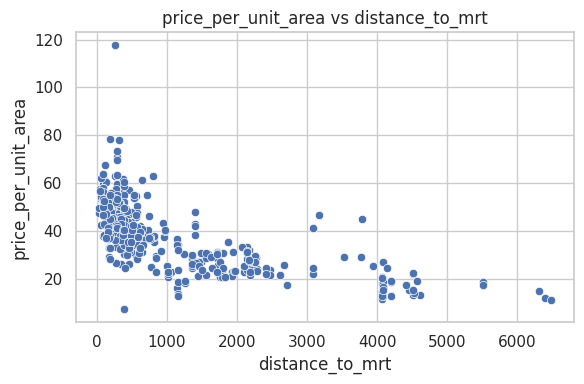

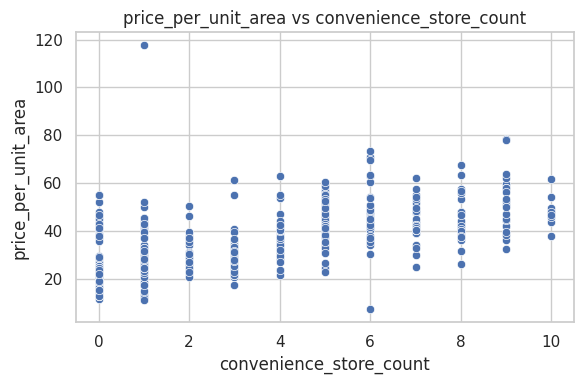

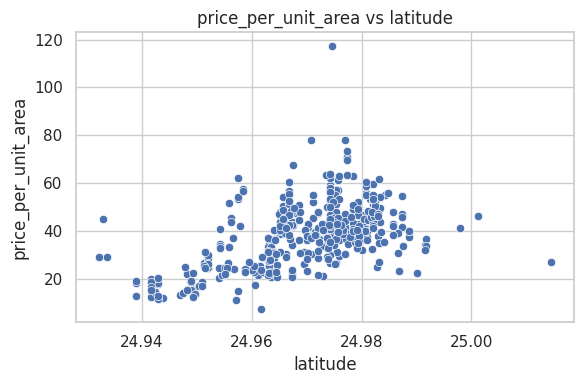

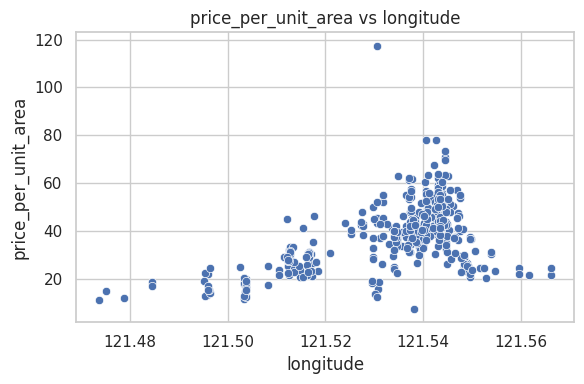

In [ ]:
target = 'price_per_unit_area'
features = [col for col in numerical_cols if col != target]

for col in features:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=df[col], y=df[target])
    plt.title(f'{target} vs {col}')
    plt.xlabel(col)
    plt.ylabel(target)
    plt.tight_layout()
    plt.show()


#Multivariate Analysis (Multiple Features Together)

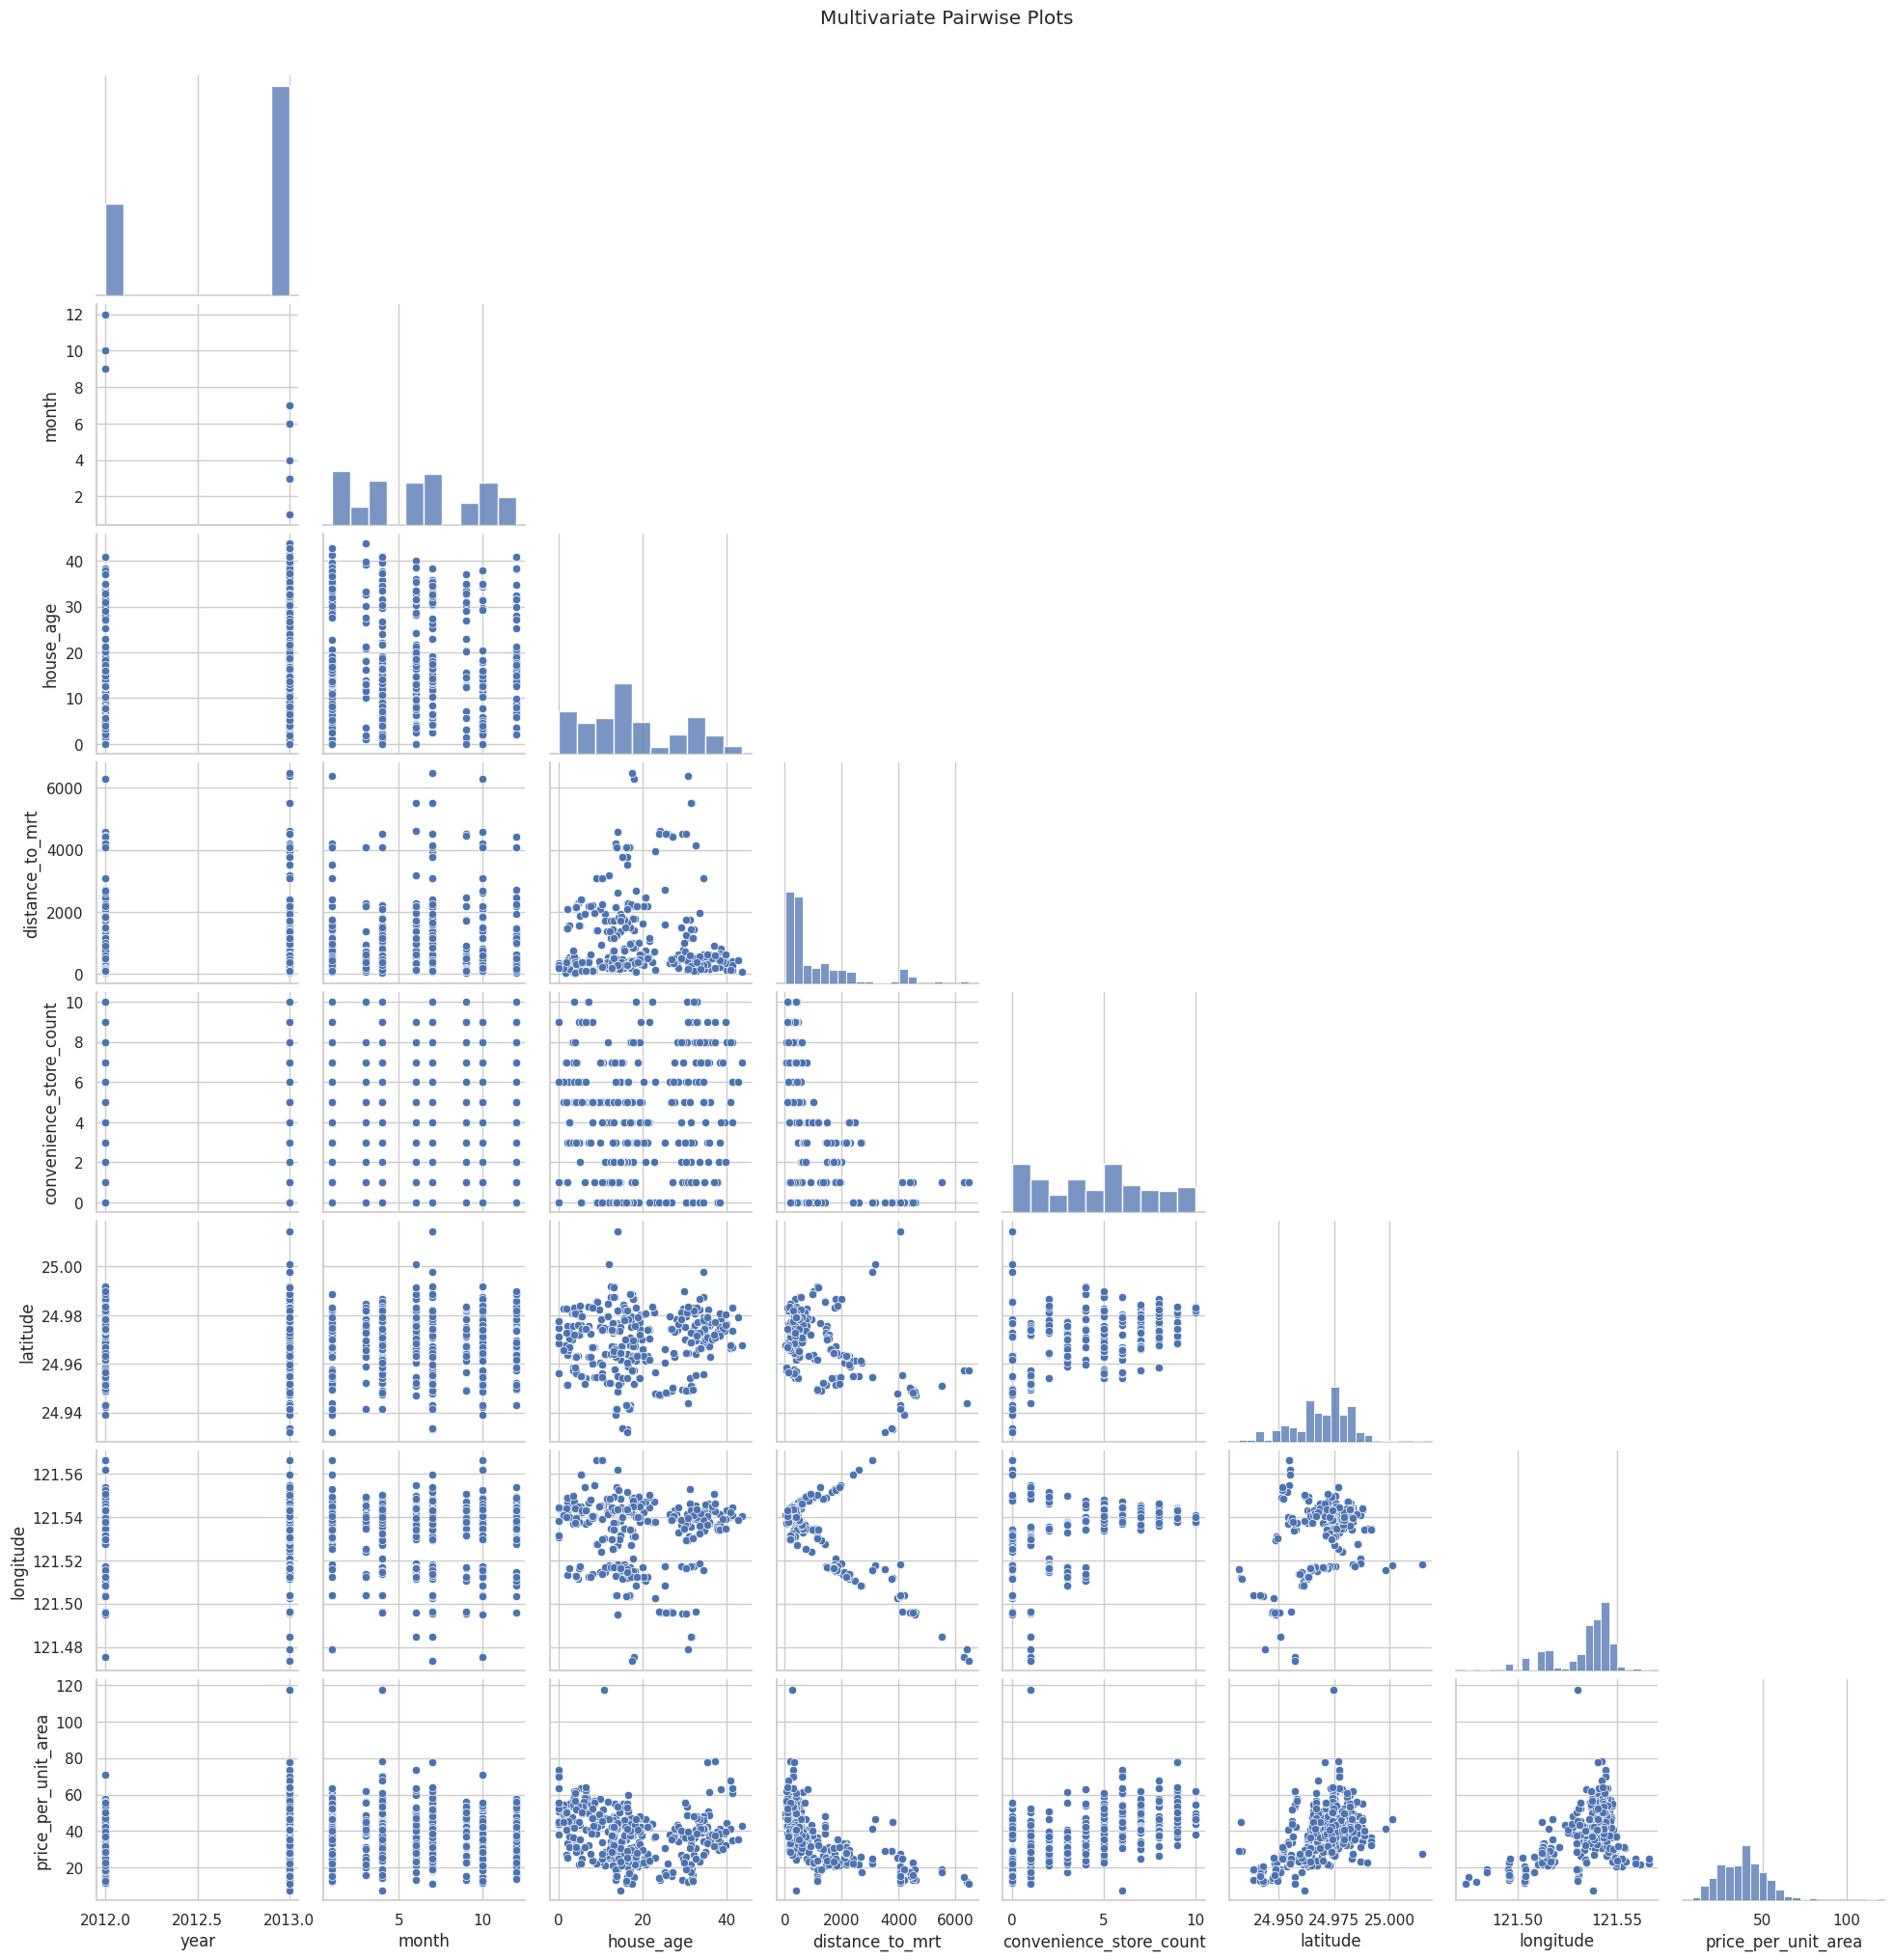

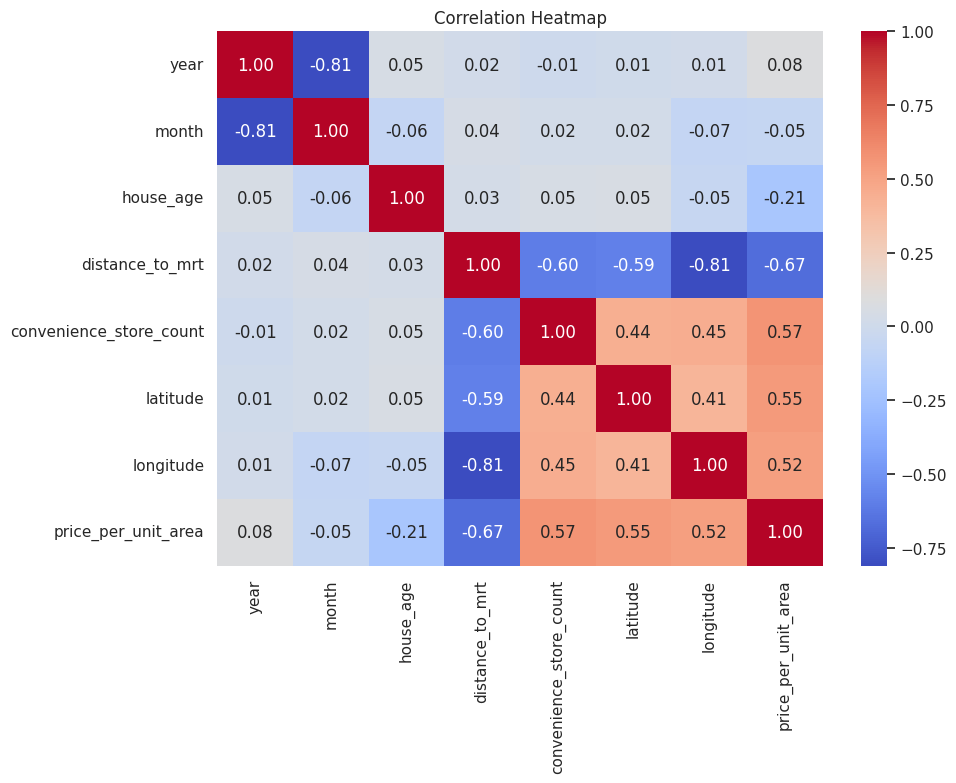

In [ ]:
# Pairplot of all numeric features
sns.pairplot(df[numerical_cols], corner=True)
plt.suptitle("Multivariate Pairwise Plots", y=1.02)
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()


 Skewness & Kurtosis Check

In [ ]:
from scipy.stats import skew, kurtosis

for col in df.select_dtypes(include=['int64', 'float64']).columns:
    print(f"{col}: Skewness = {skew(df[col]):.2f}, Kurtosis = {kurtosis(df[col]):.2f}")


year: Skewness = -0.85, Kurtosis = -1.28
month: Skewness = 0.03, Kurtosis = -1.05
house_age: Skewness = 0.38, Kurtosis = -0.88
distance_to_mrt: Skewness = 1.88, Kurtosis = 3.15
convenience_store_count: Skewness = 0.15, Kurtosis = -1.07
latitude: Skewness = -0.44, Kurtosis = 0.25
longitude: Skewness = -1.22, Kurtosis = 1.17
price_per_unit_area: Skewness = 0.60, Kurtosis = 2.14


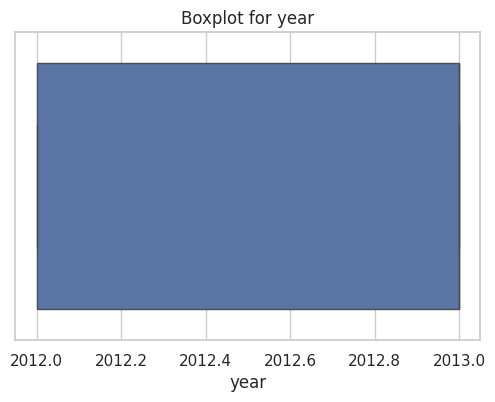

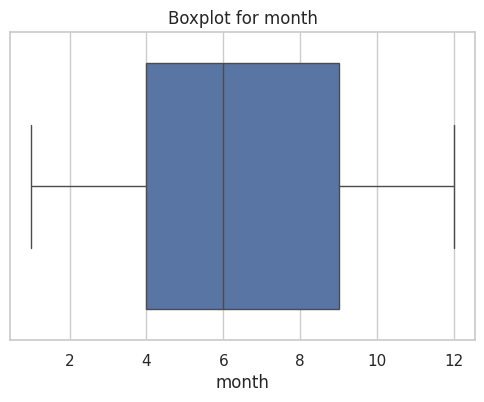

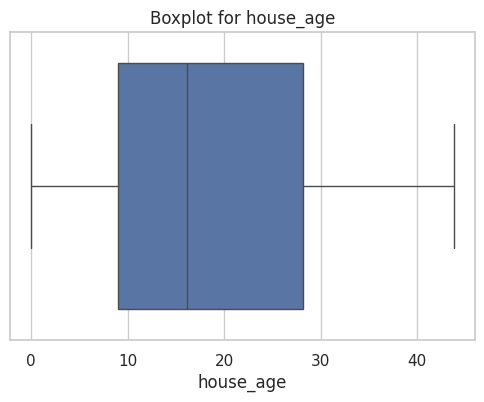

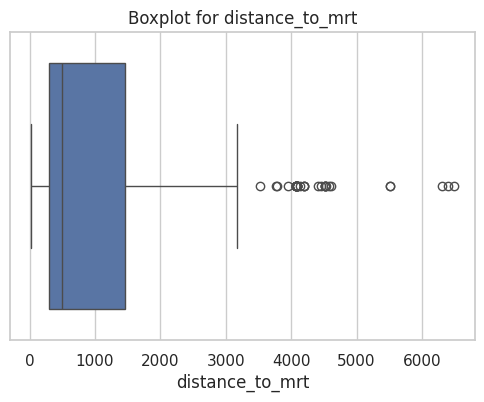

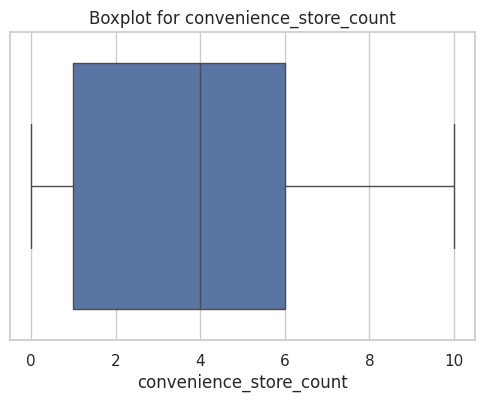

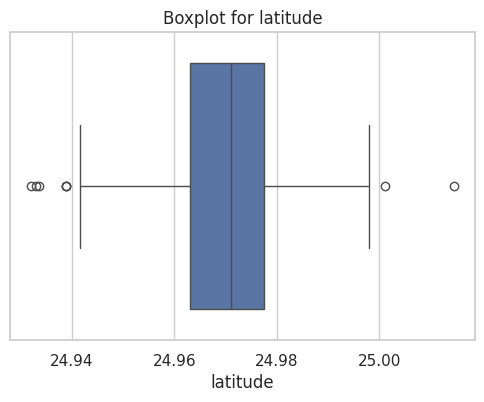

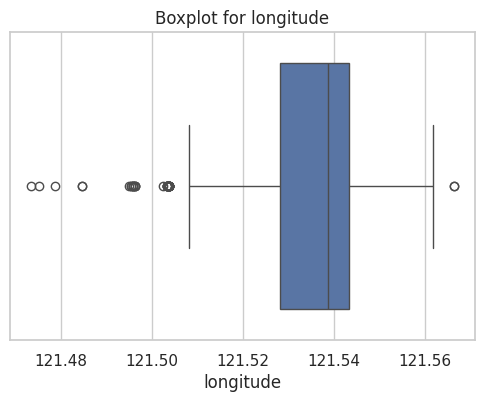

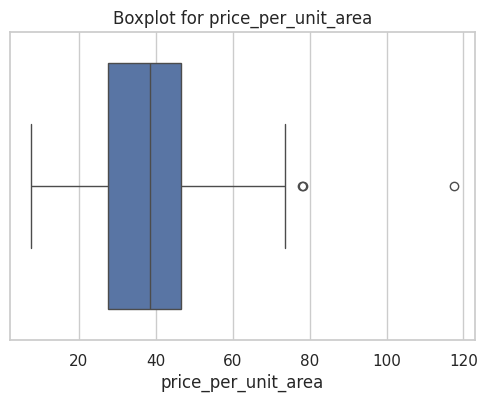

In [ ]:
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot for {col}")
    plt.show()


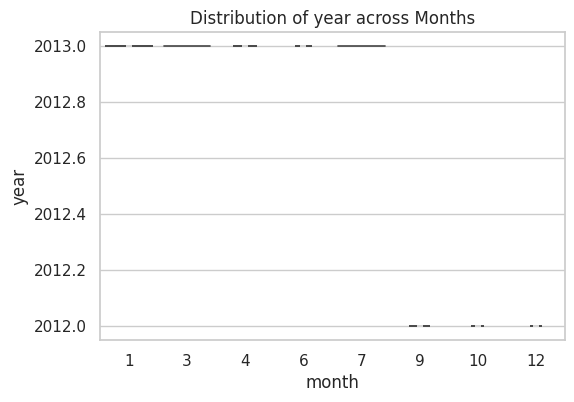

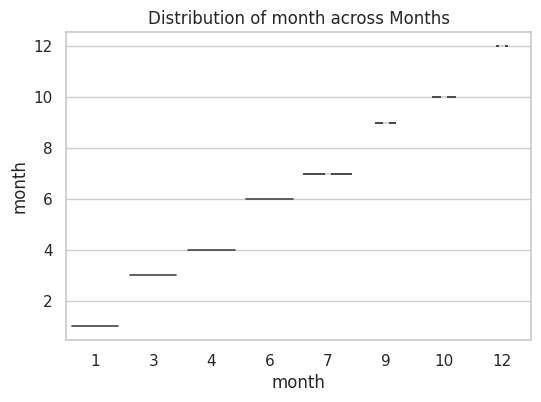

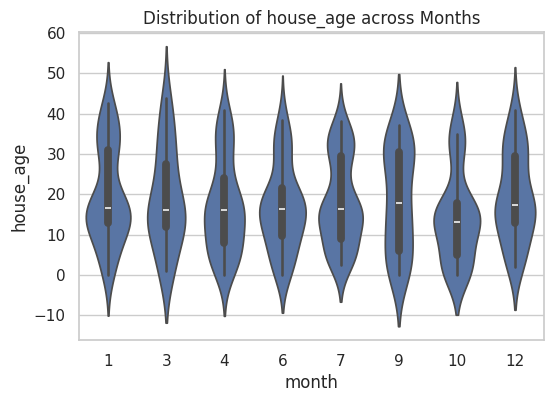

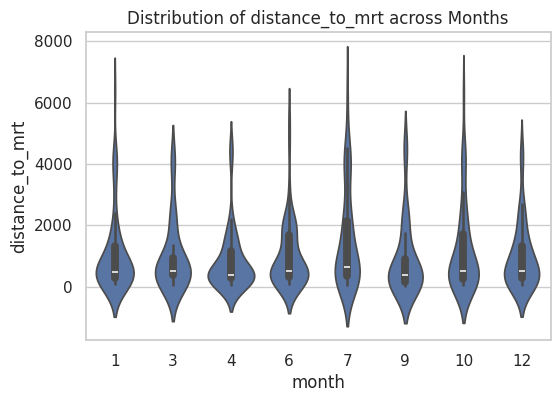

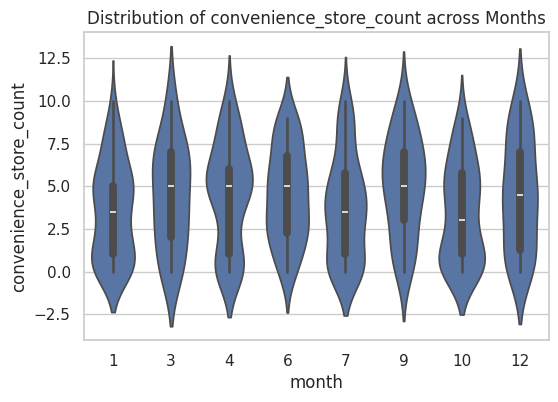

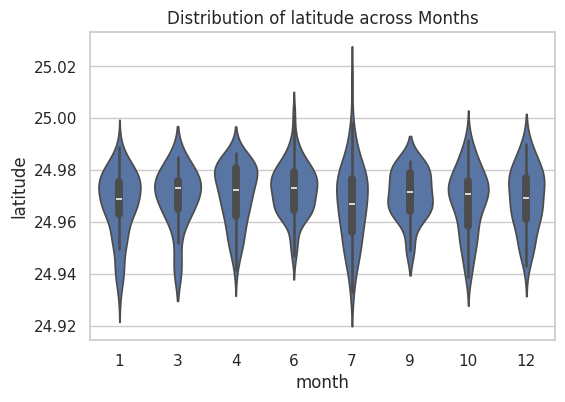

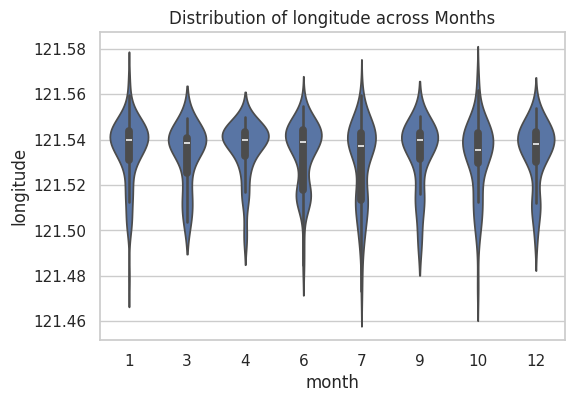

In [ ]:
for col in features:
    plt.figure(figsize=(6, 4))
    sns.violinplot(x='month', y=col, data=df)
    plt.title(f"Distribution of {col} across Months")
    plt.show()


In [ ]:
from scipy.stats import zscore

z_scores = df[numerical_cols].apply(zscore)
outliers = (z_scores.abs() > 3).sum()
print("Number of outliers per feature:\n", outliers)


Number of outliers per feature:
 year                       0
month                      0
house_age                  0
distance_to_mrt            5
convenience_store_count    0
latitude                   1
longitude                  5
price_per_unit_area        1
dtype: int64


In [ ]:
df

,year,month,house_age,distance_to_mrt,convenience_store_count,latitude,longitude,price_per_unit_area
0,2012,12,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012,12,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013,7,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013,7,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012,10,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,2013,1,13.7,4082.01500,0,24.94155,121.50381,15.4
410,2012,9,5.6,90.45606,9,24.97433,121.54310,50.0
411,2013,4,18.8,390.96960,7,24.97923,121.53986,40.6
412,2013,1,8.1,104.81010,5,24.96674,121.54067,52.5


/tmp/ipython-input-49-2118236238.py:14: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


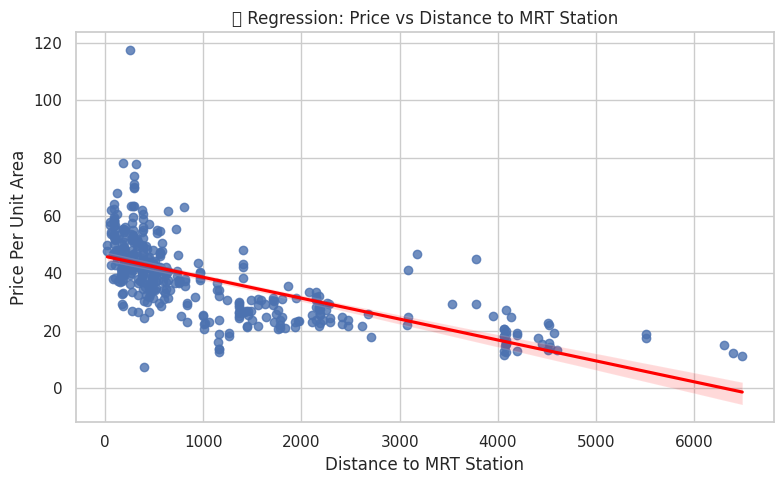

In [ ]:
# Rename for easier reference
df.rename(columns={
    'x3 distance to the nearest mrt station': 'distance_to_mrt',
    'y house price of unit area': 'price_per_unit_area'
}, inplace=True)

# Create regression plot
plt.figure(figsize=(8, 5))
sns.regplot(data=df, x='distance_to_mrt', y='price_per_unit_area', line_kws={"color": "red"})
plt.title("📉 Regression: Price vs Distance to MRT Station")
plt.xlabel("Distance to MRT Station")
plt.ylabel("Price Per Unit Area")
plt.grid(True)
plt.tight_layout()
plt.show()

<Axes: xlabel='house_age', ylabel='price_per_unit_area'>

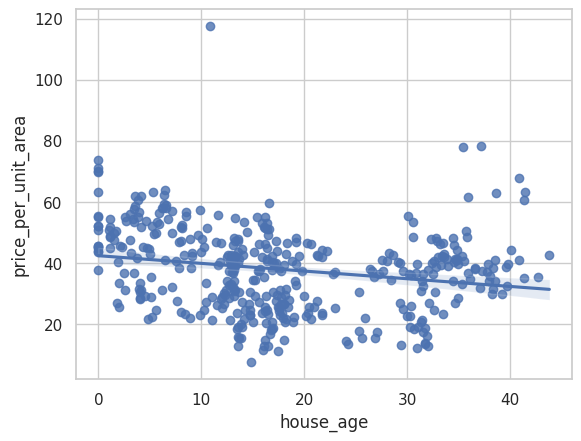

In [ ]:
sns.regplot(data=df, x='house_age', y='price_per_unit_area')


<Axes: xlabel='convenience_store_count', ylabel='price_per_unit_area'>

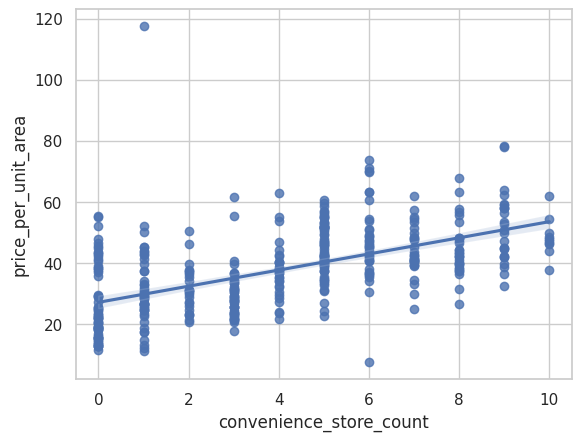

In [ ]:
sns.regplot(data=df, x='convenience_store_count', y='price_per_unit_area')


<Axes: xlabel='year', ylabel='price_per_unit_area'>

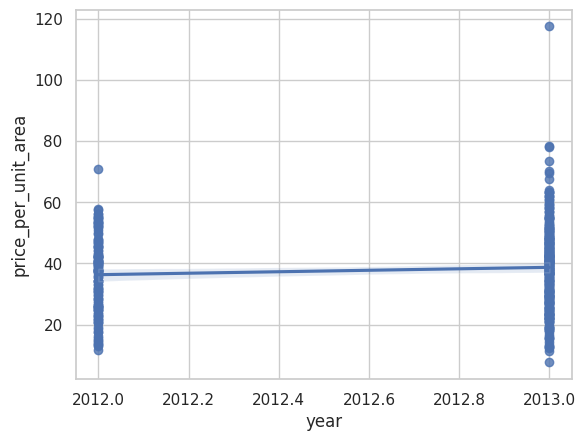

In [ ]:
sns.regplot(data=df, x='year', y='price_per_unit_area')


<Axes: xlabel='longitude', ylabel='price_per_unit_area'>

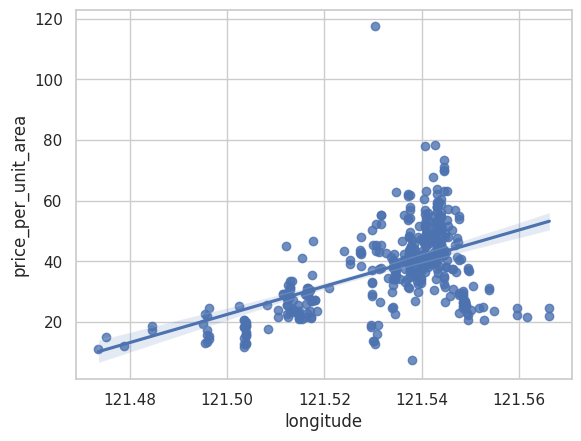

In [ ]:
sns.regplot(data=df, x='longitude', y='price_per_unit_area')


<Axes: xlabel='latitude', ylabel='price_per_unit_area'>

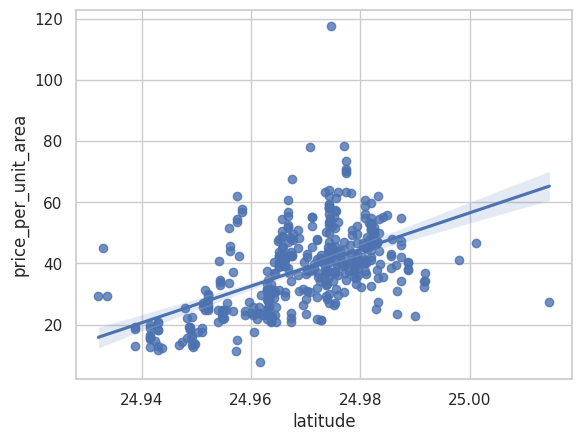

In [ ]:
sns.regplot(data=df, x='latitude', y='price_per_unit_area')


In [ ]:
df1=df.copy()
df2=df.copy()

In [ ]:
df2.head()

,year,month,house_age,distance_to_mrt,convenience_store_count,latitude,longitude,price_per_unit_area
0,2012,12,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012,12,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013,7,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013,7,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012,10,5.0,390.56840,5,24.97937,121.54245,43.1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   year                     414 non-null    int64  
 1   month                    414 non-null    int64  
 2   house_age                414 non-null    float64
 3   distance_to_mrt          414 non-null    float64
 4   convenience_store_count  414 non-null    int64  
 5   latitude                 414 non-null    float64
 6   longitude                414 non-null    float64
 7   price_per_unit_area      414 non-null    float64
dtypes: float64(5), int64(3)
memory usage: 26.0 KB


#Train and test split

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [62]:
X = df1[['year', 'house_age',
        'distance_to_mrt','convenience_store_count', 'latitude', 'longitude']]
y = df1['price_per_unit_area']

In [63]:
# Split the data into training and testing sets (80% train, 20% test)
# random_state ensures reproducibility of the split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [66]:
print("Data split into training and testing sets:")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

Data split into training and testing sets:
X_train shape: (331, 6)
X_test shape: (83, 6)
y_train shape: (331,)
y_test shape: (83,)


In [67]:
# Create a Linear Regression model object
model = LinearRegression()

In [68]:
# Train the model using the training data
model.fit(X_train, y_train)

LinearRegression()

In [69]:
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef:.4f}")
# The intercept of the model
print(f"Intercept: {model.intercept_:.4f}")

year: 2.6431
house_age: -0.2761
distance_to_mrt: -0.0046
convenience_store_count: 1.1167
latitude: 238.1960
longitude: -32.4229
Intercept: -7283.4229


In [70]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [71]:
y_pred

array([48.56935623, 42.71580807, 45.41789528, 39.51176212, 28.4539931 ,
       43.54540314, 44.08519342, 46.64541131, 22.72589088, 52.85786385,
       33.0226    , 35.67405533, 37.77260568, 22.85124116, 36.381197  ,
       33.82004626, 42.64681123, 45.19265315, 29.69110494, 45.21515963,
        2.9477116 , 34.47836678, 48.56053551, 44.29754229, 12.15052564,
       39.47323778, 12.81232214, 42.77484374, 34.10106298, 38.33611796,
       12.38346862, 40.14453437, 35.82023069, 29.12283138, 46.68050695,
       32.13453693, 50.40809082, 15.91376333, 47.60503424, 41.11393022,
       36.57511501, 41.29516198, 46.49711625, 38.00062838, 40.12797897,
       46.35170412, 43.14760688, 21.23388416, 48.19168184, 46.24285704,
       48.56935623, 49.33841883, 41.638235  , 43.25198218, 37.0412642 ,
       15.88615212, 35.76030095, 34.30888119, 28.37115945, 46.64541131,
       34.57659931, 33.42916038, 15.88615212,  9.94938258,  9.62555533,
       34.505978  , 27.71007332, 45.95898097, 32.23736188, 31.09

In [72]:
y_test

,price_per_unit_area
358,45.1
350,42.3
373,52.2
399,37.3
369,22.8
...,...
31,25.0
283,23.5
157,35.6
203,46.1


In [74]:
error=y_pred-y_test

In [75]:
error

,price_per_unit_area
358,3.469356
350,0.415808
373,-6.782105
399,2.211762
369,5.653993
...,...
31,15.813547
283,9.165257
157,7.060451
203,-1.931973


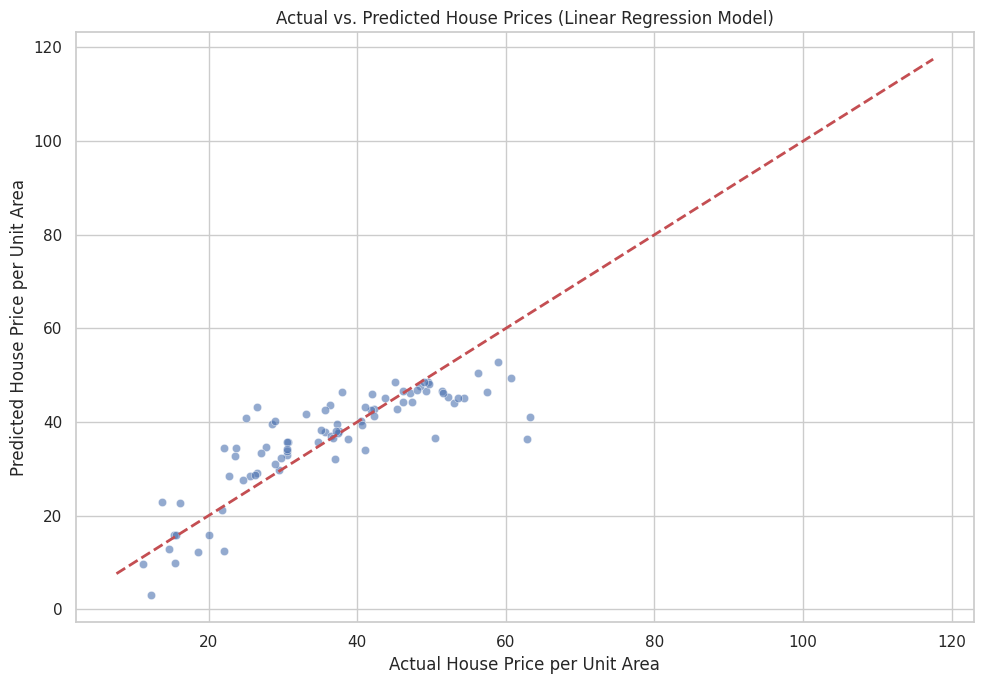

In [76]:
# Plotting Actual vs. Predicted values
plt.figure(figsize=(10, 7))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6) # alpha for transparency to see overlapping points
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2) # Red dashed line for perfect prediction
plt.xlabel("Actual House Price per Unit Area")
plt.ylabel("Predicted House Price per Unit Area")
plt.title("Actual vs. Predicted House Prices (Linear Regression Model)")
plt.grid(True)
plt.tight_layout()
plt.show() # In a real script, this would display the plot
# plt.savefig('actual_vs_predicted_prices.png') # To save the plot

#Calcualtion metrics

In [78]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Assuming y_test and y_pred are already available from the previous linear regression step

# Recalculate Mean Squared Error (MSE) to ensure it's defined in the current scope
mse = mean_squared_error(y_test, y_pred)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Define a function to calculate Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred):
    # Avoid division by zero for y_true values that are 0
    # Adding a small epsilon or handling cases where y_true is zero if necessary for robustness
    # For real estate prices, y_true is unlikely to be zero, but good practice to consider.
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y_test, y_pred)

# Define a function to calculate Logarithmic Root Mean Squared Error (LRMSI / RMSLE)
# RMSLE is commonly used when target variables have a wide range or are skewed.
def root_mean_squared_log_error(y_true, y_pred):
    # Add 1 to y_true and y_pred before taking logarithm to handle zero values
    # np.log1p(x) calculates log(1+x)
    return np.sqrt(np.mean(np.power(np.log1p(y_pred) - np.log1p(y_true), 2)))

lrmsi = root_mean_squared_log_error(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}") # MSE was calculated in the previous step
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"Logarithmic Root Mean Squared Error (LRMSI/RMSLE): {lrmsi:.2f}")

Mean Squared Error (MSE): 51.12
Mean Absolute Error (MAE): 5.13
Root Mean Squared Error (RMSE): 7.15
Mean Absolute Percentage Error (MAPE): 16.46%
Logarithmic Root Mean Squared Error (LRMSI/RMSLE): 0.24


#Polynomial model learning

In [92]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

# Load the dataset (assuming df is already loaded from 'Real estate 2025.csv')
# df = pd.read_csv('Real estate 2025.csv')

# Define features (X) and target (y)
# Using the same features as in linear regression for consistency
X = df2[['year', 'house_age',
        'distance_to_mrt','convenience_store_count', 'latitude', 'longitude']]
y = df2['price_per_unit_area']

# Set the degree of the polynomial features
# A common starting point is degree=2 or degree=3.
# Higher degrees can lead to overfitting, especially with many features.
degree = 3
# Initialize the PolynomialFeatures transformer
# include_bias=False means it won't add a column of all ones,
# as the LinearRegression model (if used next) will add its own intercept.
poly = PolynomialFeatures(degree=degree, include_bias=False)

# Transform the original features into polynomial features
# This creates new features like X^2, Y^2, X*Y, etc.
X_poly = poly.fit_transform(X)

# Optionally, you can see the names of the new polynomial features
print("Example of generated polynomial feature names (first 5):")
print(poly.get_feature_names_out(X.columns)[:5])
print(f"Total number of polynomial features generated: {X_poly.shape[1]}")

# Split the transformed polynomial features data into training and testing sets
# test_size=0.2 means 20% of data will be used for testing.
# random_state ensures reproducibility of your data split.
X_train_poly, X_test_poly, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

print("\nData split into training and testing sets with polynomial features:")
print(f"Shape of X_train_poly (training features): {X_train_poly.shape}")
print(f"Shape of X_test_poly (testing features): {X_test_poly.shape}")
print(f"Shape of y_train (training target): {y_train.shape}")
print(f"Shape of y_test (testing target): {y_test.shape}")

Example of generated polynomial feature names (first 5):
['year' 'house_age' 'distance_to_mrt' 'convenience_store_count' 'latitude']
Total number of polynomial features generated: 83

Data split into training and testing sets with polynomial features:
Shape of X_train_poly (training features): (331, 83)
Shape of X_test_poly (testing features): (83, 83)
Shape of y_train (training target): (331,)
Shape of y_test (testing target): (83,)


In [93]:
# --- Step 5: Train the Polynomial Regression Model ---
# Polynomial regression is implemented using LinearRegression on the transformed polynomial features.
poly_model = LinearRegression()
print("\nTraining Polynomial Regression Model...")
poly_model.fit(X_train_poly, y_train)
print("Model training complete.")



Training Polynomial Regression Model...
Model training complete.


In [94]:
y_pred_poly = poly_model.predict(X_test_poly)
print("\nPredictions made on the test set.")
print("First 5 predicted values:")
print(y_pred_poly[:5])


Predictions made on the test set.
First 5 predicted values:
[55.49237684 37.84137852 54.38458872 42.87595194 21.23046886]


In [95]:
error=y_pred_poly-y_test

In [96]:
error

,price_per_unit_area
358,10.392377
350,-4.458621
373,2.184589
399,5.575952
369,-1.569531
...,...
31,2.901544
283,10.261882
157,1.745201
203,0.843213



Actual vs. Predicted House Prices plot saved as 'polynomial_actual_vs_predicted_prices.png'.


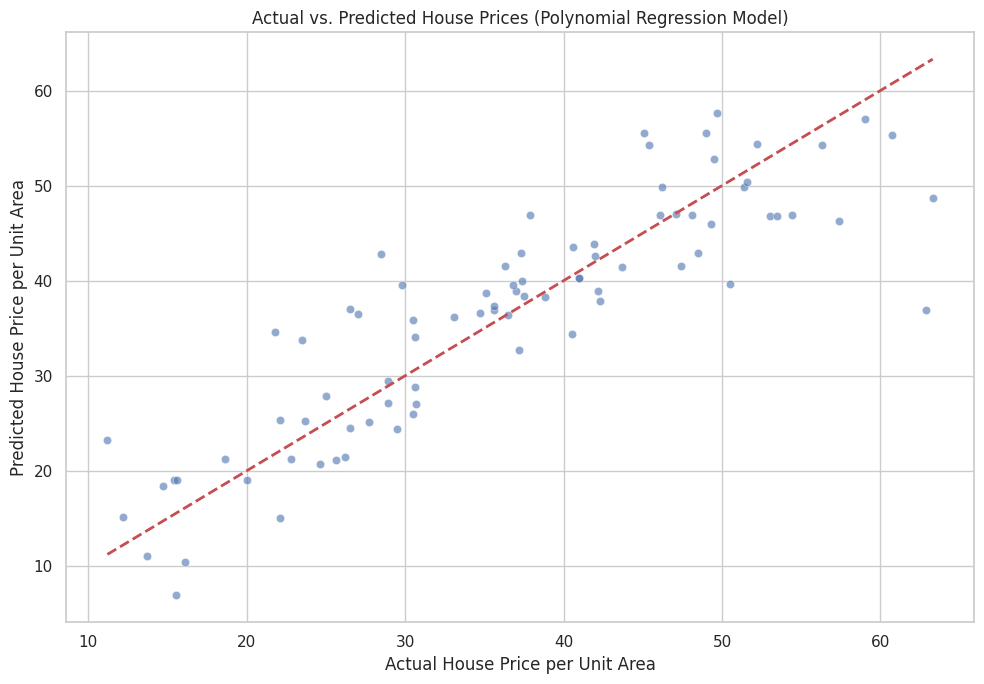

In [97]:
# --- Step 8: Generate Diagram (Actual vs. Predicted Values) ---
plt.figure(figsize=(10, 7))
sns.scatterplot(x=y_test, y=y_pred_poly, alpha=0.6) # alpha for transparency to see overlapping points
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2) # Line for perfect prediction
plt.xlabel("Actual House Price per Unit Area")
plt.ylabel("Predicted House Price per Unit Area")
plt.title("Actual vs. Predicted House Prices (Polynomial Regression Model)")
plt.grid(True)
plt.tight_layout()
# plt.show() # Uncomment to display the plot when running as a script
plt.savefig('polynomial_actual_vs_predicted_prices.png') # Saves the plot to a file
print("\nActual vs. Predicted House Prices plot saved as 'polynomial_actual_vs_predicted_prices.png'.")

In [98]:

# Mean Squared Error (MSE)
mse_poly = mean_squared_error(y_test, y_pred_poly)
print(f"Mean Squared Error (MSE): {mse_poly:.2f}")

# Mean Absolute Error (MAE)
mae_poly = mean_absolute_error(y_test, y_pred_poly)
print(f"Mean Absolute Error (MAE): {mae_poly:.2f}")

# Root Mean Squared Error (RMSE)
rmse_poly = np.sqrt(mse_poly)
print(f"Root Mean Squared Error (RMSE): {rmse_poly:.2f}")

# R-squared (R2)
r2_poly = r2_score(y_test, y_pred_poly)
print(f"R-squared (R2): {r2_poly:.2f}")

# Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred):
    non_zero_true = (y_true != 0)
    if not np.any(non_zero_true):
        return np.nan
    errors = np.abs((y_true[non_zero_true] - y_pred[non_zero_true]) / y_true[non_zero_true])
    return np.mean(errors) * 100

mape_poly = mean_absolute_percentage_error(y_test, y_pred_poly)
print(f"Mean Absolute Percentage Error (MAPE): {mape_poly:.2f}%")

# Logarithmic Root Mean Squared Error (LRMSI / RMSLE)
def root_mean_squared_log_error(y_true, y_pred):
    y_pred_clipped = np.maximum(y_pred, 1e-10) # Clip predicted values to be non-negative
    return np.sqrt(np.mean(np.power(np.log1p(y_pred_clipped) - np.log1p(y_true), 2)))

lrmsi_poly = root_mean_squared_log_error(y_test, y_pred_poly)
print(f"Logarithmic Root Mean Squared Error (LRMSI/RMSLE): {lrmsi_poly:.2f}")

Mean Squared Error (MSE): 40.27
Mean Absolute Error (MAE): 4.77
Root Mean Squared Error (RMSE): 6.35
R-squared (R2): 0.76
Mean Absolute Percentage Error (MAPE): 15.50%
Logarithmic Root Mean Squared Error (LRMSI/RMSLE): 0.20
